# TensorBoard


TensorBoard es una herramienta de medición y visualización desarrollada por ingenieros de Google para entender el confuso mundo de TensorFlow de manera gráfica y sencilla.
Así, TensorBoard nos ayuda a visualizar la estructura computacional de TensorFlow, además de habilita métricas experimentales como "loss" y "accuracy".

## Dashboard

### Scalars
Muestra como las métricas cambian a lo largo del tiempo para cada corrimiento. De igual manera, se puede dar seguimiento a la velocidad de entrenamiento, la tasa de entrenamiento y otros valores.


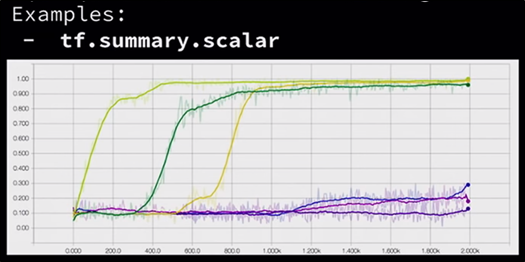

In [12]:
from IPython.display import Image
Image(filename='scalar.png')

### Graphs

Ayuda al usuario a observar gráficamente las capas de un modelo y por ende si están construidas adecuadamente.


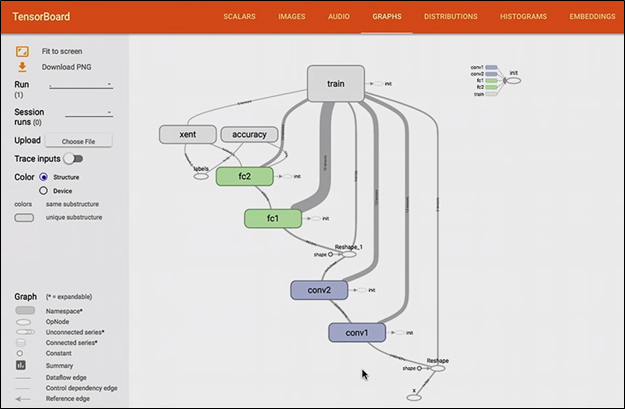

In [13]:
Image(filename='graph.png')

### Distributions / Histograms

Muestra la distribución del tensor o variable a través del tiempo. Esto puede ser de mucha utilidad para visualizar los pesos y sesgos y visualizar su comportamiento.


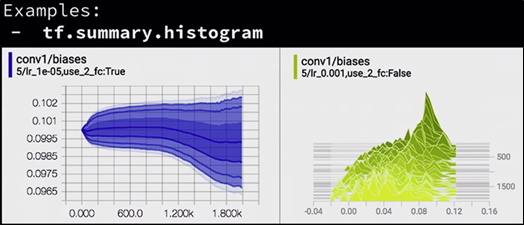

In [14]:
Image(filename='histogram.png')

## TensorBoard

Para nuestro ejemplo utilizaremos el dataset MNIST y aplicaremos Keras model.fit().

Iniciamos cargando la extensión de TensorBoard para Notebook.


In [1]:
%load_ext tensorboard.notebook

Importamos TensorFlow y datatime.


In [2]:
import tensorflow as tf
import datetime, os

Procedemos a borrar cualquier log de corrimientos anteriores.


In [3]:
# Clear any logs from previous runs
# !del -rf ./logs/ 
os.system('del -rf /logs/')
tf.reset_default_graph()

A continuación, normalizaremos nuestro dataset y generamos una función basada en el modelo Keras para clasificar las imágenes en diez categorías.


In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def create_model():
  return tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
  ])

Al utilizar el modelo Keras nos aseguramos de que los logs son creados y guardados para su análisis. Habilitamos la opción de Histograma para cada corrimiento.


In [5]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=x_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(x_test, y_test), 
          callbacks=[tensorboard_callback])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 367us/sample - loss: 0.2194 - acc: 0.9350 - val_loss: 0.1058 - val_acc: 0.9696
Epoch 2/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0972 - acc: 0.9705 - val_loss: 0.0723 - val_acc: 0.9763
Epoch 3/5
60000/60000 [==============================] - 26s 426us/sample - loss: 0.0662 - acc: 0.9790 - val_loss: 0.0704 - val_acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 24s 408us/sample - loss: 0.0518 - acc: 0.9834 - val_loss: 0.0633 - val_acc: 0.9816
Epoch 5/5
60000/60000 [==============================] - 23s 386us/sample - loss: 0.0417 - acc: 0.9862 - val_loss: 0.0614 - val_acc: 0.9809


In [9]:
%tensorboard --logdir ./logs/fit

Reusing TensorBoard on port 6006 (pid 12784), started 0:01:08 ago. (Use '!kill 12784' to kill it.)